In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data_to_load)
clinical_trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combine_df = pd.merge(mouse_drug,clinical_trial, how="left", on="Mouse ID")

# Display the data table for preview
combine_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
combine_df.groupby(["Drug", "Timepoint"]).mean()

# Convert to DataFrame
mean_tumor_vol = combine_df.groupby(["Drug", "Timepoint"]).mean()

# Preview DataFrame
mean_tumor_df = pd.DataFrame(mean_tumor_vol).reset_index().drop("Metastatic Sites",axis=1)

mean_tumor_df.head(5)



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
combine_df.groupby(["Drug", "Timepoint"]).sem()
# Convert to DataFrame
std_error = combine_df.groupby(["Drug", "Timepoint"]).sem()
# Preview DataFrame
std_error_df = pd.DataFrame(std_error).reset_index().drop(["Metastatic Sites", "Mouse ID"],axis=1)
std_error_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mean = mean_tumor_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

tumor_vol_mean=mean_tumor_df.pivot_table(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
# Preview that Reformatting worked
pivot_mean.head()
tumor_vol_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
pivot_error = std_error_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

pivot_error.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


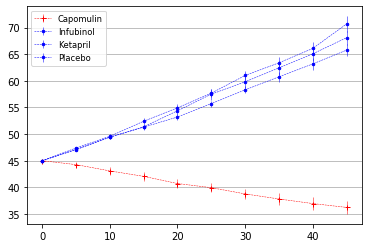

In [6]:
# Generate the Plot (with Error Bars)
plt.errorbar(pivot_mean.index, pivot_mean["Capomulin"], yerr=pivot_error["Capomulin"], color="r", marker="+", markersize=5, linestyle="dashed", linewidth=0.50)

plt.errorbar(pivot_mean.index, pivot_mean["Infubinol"], yerr=pivot_error["Infubinol"], color="b", marker=".", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pivot_mean.index, pivot_mean["Ketapril"], yerr=pivot_error["Ketapril"], color="b", marker=".", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pivot_mean.index, pivot_mean["Placebo"], yerr=pivot_error["Placebo"], color="b", marker=".", markersize=5, linestyle="dashed", linewidth=0.50)
# Save the Figure

plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)




In [7]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
combine_df.groupby(["Drug", "Timepoint"]).mean()

mean_met_sites = combine_df.groupby(["Drug", "Timepoint"]).mean()

# Convert to DataFrame
mean_met_df = pd.DataFrame(mean_met_sites).reset_index().drop("Tumor Volume (mm3)",axis=1)

# Preview DataFrame
mean_met_df.head()





,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
combine_df.groupby(["Drug", "Timepoint"]).sem()

std_error_met = combine_df.groupby(["Drug", "Timepoint"]).sem()
# Convert to DataFrame

std_error_met_df = pd.DataFrame(std_error_met).drop(["Mouse ID", "Tumor Volume (mm3)"],axis=1)


# Preview DataFrame
std_error_met_df.head()





Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_pivot = std_error_met_df.pivot_table(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview that Reformatting worked
metastatic_pivot.head()
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


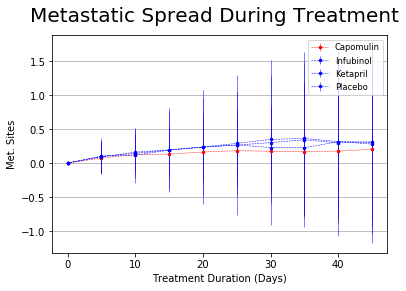

In [16]:
# # Generate the Plot (with Error Bars)
# plt.errorbar(pivot_met_mean.index, pivot_met_mean["Capomulin"], yerr=pivot_met_error["Capomulin"], color="r", marker="+", markersize=5, linestyle="dashed", linewidth=0.50)
# plt.errorbar(pivot_met_mean.index, pivot_met_mean["Infubinol"], yerr=pivot_met_error["Infubinol"], color="b", marker=".", markersize=5, linestyle="dashed", linewidth=0.50)
# plt.errorbar(pivot_met_mean.index, pivot_met_mean["Ketapril"], yerr=pivot_met_error["Ketapril"], color="b", marker=".", markersize=5, linestyle="dashed", linewidth=0.50)
# plt.errorbar(pivot_met_mean.index, pivot_met_mean["Placebo"], yerr=pivot_met_error["Placebo"], color="b", marker=".", markersize=5, linestyle="dashed", linewidth=0.50)


# # Show the Figure
# plt.grid(axis='y')
# plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)
fig, ax_1 = plt.subplots()
ax_1.set_xlabel('Treatment Duration (Days)')


ax_1.set_ylabel('Met. Sites')

fig.suptitle('Metastatic Spread During Treatment', fontsize=20)

ax_1.errorbar(metastatic_pivot.index, metastatic_pivot["Capomulin"], 
            yerr=pivot_error["Infubinol"], color="r", marker=".", 
            markersize=5, linestyle="dashed", 
            linewidth=0.50)
ax_1.errorbar(metastatic_pivot.index, metastatic_pivot["Infubinol"], yerr=pivot_error["Infubinol"], color="b", marker=".", markersize=5, linestyle="dashed", linewidth=0.50)
ax_1.errorbar(metastatic_pivot.index, metastatic_pivot["Ketapril"], yerr=pivot_error["Ketapril"], color="b", marker=".", markersize=5, linestyle="dashed", linewidth=0.50)
ax_1.errorbar(metastatic_pivot.index, metastatic_pivot["Placebo"], yerr=pivot_error["Placebo"], color="b", marker=".", markersize=5, linestyle="dashed", linewidth=0.50)

ax_1.grid(axis='y')
ax_1.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)




![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
combine_df.groupby(["Drug", "Timepoint"]).count()

# Convert to DataFrame
mouse_count = combine_df.groupby(["Drug", "Timepoint"]).count()

mouse_count_df = pd.DataFrame(mouse_count).reset_index().drop(["Metastatic Sites","Tumor Volume (mm3)"], axis=1)

# Preview DataFrame
mouse_count_df.head()





,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mouse_count = mouse_count_df.pivot_table(index='Timepoint', columns='Drug')['Mouse ID']


# Preview the Data Frame
pivot_mouse_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


AttributeError: module 'matplotlib.pyplot' has no attribute 'plo'

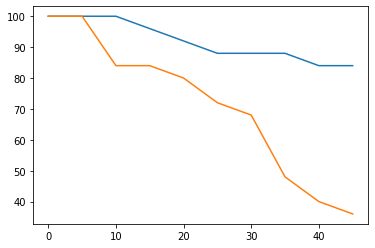

In [14]:
# Generate the Plot (Accounting for percentages)
plt.plot(pivot_mouse_count.index, 100 * pivot_mouse_count["Capomulin"]/25)
plt.plot(pivot_mouse_count.index, 100 * pivot_mouse_count["Infubinol"]/25)
plt.plo
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug
drug_columns = ["Capomulin",
               "Ceftamin",
               "Infubinol",
               "Ketapril",
               "Naftisol",
               "Placebo",
               "Propriva",
               "Ramicane",
               "Stelasyn",
               "Zoniferol"]
pct_change=(tumor_vol_mean[drug_columns].iloc[-1]/tumor_vol_mean[drug_columns].iloc[0]-1)

print(pct_change)


In [ ]:
# # Store all Relevant Percent Changes into a Tuple


# # Splice the data between passing and failing drugs


# # Orient widths. Add labels, tick marks, etc. 


# # Use functions to label the percentages of changes


# # Call functions to implement the function calls


# # Save the Figure


# # Show the Figure
# # fig.show()

# #into a Tuple
# rel_drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
# rel_pct_change = [-19.475303,  46.123472, 57.028795, 51.297960]
# x_axis = np.arange(len(rel_pct_change))
# # Splice the data between passing and failing drugs
# # Orient widths. Add labels, tick marks, etc. 
# plt.bar(x_axis, rel_pct_change, width=1, color=("g","r","r","r"), align="edge", label="rel_pct_change")
# tick_locations = [value for value in x_axis + 1]
# plt.xticks(tick_locations, rel_drugs)
# plt.title("Tumor Change Over 45 Day Treatment")
# plt.ylabel("Tumor Volume Change (%)")
# plt.xlim(-.25, 4.25)
# plt.ylim(-30, 70)
# plt.grid(axis="both")
# plt.tight_layout()

# fig.show()
# # Use functions to label the percentages of changes
# # Call functions to implement the function calls



rel_drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

new_list = [pct_change[drug_name] for drug_name in rel_drugs]
print(new_list)

fig, ax_2 = plt.subplots()
ax_2.bar(rel_drugs, new_list, color='r')
ax_2.bar(rel_drugs[0], new_list[0],color='gr')

ax_2.set_ylabel('% Tumor Volume Change')
ax_2.set_title('Tumor Change Over 45 Day Treatment')
ax_2.grid(axis="both")

![Metastatic Spread During Treatment](../Images/change.png)